# 逻辑回归

## 1. 使用梯度下降的求解过程

问题：对于点(0,1)，点(1,1)和点(2,1)，使用逻辑回归求解模型。

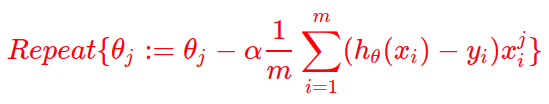

epoch: 000, a: 0.050, b: 0.017, loss: 0.6661
epoch: 001, a: 0.098, b: 0.032, loss: 0.6420
epoch: 002, a: 0.143, b: 0.045, loss: 0.6204
epoch: 003, a: 0.186, b: 0.057, loss: 0.6010
epoch: 004, a: 0.227, b: 0.068, loss: 0.5835
epoch: 005, a: 0.266, b: 0.077, loss: 0.5678
epoch: 006, a: 0.303, b: 0.085, loss: 0.5535
epoch: 007, a: 0.339, b: 0.093, loss: 0.5405
epoch: 008, a: 0.373, b: 0.099, loss: 0.5287
epoch: 009, a: 0.406, b: 0.104, loss: 0.5178
epoch: 010, a: 0.437, b: 0.109, loss: 0.5079
epoch: 011, a: 0.468, b: 0.112, loss: 0.4987
epoch: 012, a: 0.497, b: 0.115, loss: 0.4902
epoch: 013, a: 0.525, b: 0.118, loss: 0.4823
epoch: 014, a: 0.553, b: 0.120, loss: 0.4750
epoch: 015, a: 0.579, b: 0.121, loss: 0.4681
epoch: 016, a: 0.605, b: 0.121, loss: 0.4616
epoch: 017, a: 0.629, b: 0.122, loss: 0.4556
epoch: 018, a: 0.653, b: 0.121, loss: 0.4499
epoch: 019, a: 0.677, b: 0.121, loss: 0.4444
epoch: 020, a: 0.700, b: 0.119, loss: 0.4393
epoch: 021, a: 0.722, b: 0.118, loss: 0.4344
epoch: 022

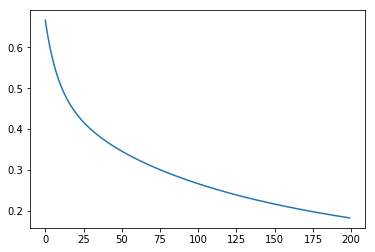

In [30]:
%matplotlib inline
import math
from matplotlib import pyplot as plt 

data = [(0,0), (1,1), (2,1)]
# data = [(0,0), (1,0), (2,1), (3,0), (4,1)]
learning_rate = 0.1
w = [0, 0]
epochs = 200

def h(a, b, x):
    """预测函数"""
    return 1 / (1 + math.exp(-(a*x+b)))

def loss_a(a, b, x, y):
    """点(x,y)在参数a方向上的损失"""
    return (h(a, b, x) - y) * x

def loss_b(a, b, x, y):
    """点(x,y)在参数b方向上的损失"""
    return h(a, b, x) - y

def loss_ab(a, b):
    """所有点在参数a和参数b上的损失"""
    loss_a_all = [loss_a(a, b, x, y) for x, y in data]
    loss_b_all = [loss_b(a, b, x, y) for x, y in data]
    return [sum(loss_a_all)/len(loss_a_all), sum(loss_b_all)/len(loss_b_all)]

def update(a, b):
    """更新权重"""
    all_loss = loss_ab(a, b)
    return [a - learning_rate * all_loss[0], b - learning_rate * all_loss[1]]

def cal_loss(a, b):
    """计算在所有点上的损失"""
    all_loss = [y * math.log(h(a, b, x)) + (1-y) * math.log(1 - h(a, b, x)) for x, y in data]
    return - sum(all_loss) / len(all_loss)

all_loss = []
for epoch in range(epochs):
    w = update(w[0], w[1])
    loss = cal_loss(w[0], w[1])
    all_loss.append(loss)
    print("epoch: %03d, a: %.3f, b: %.3f, loss: %.4f" % (epoch, w[0], w[1], loss))
    
plt.plot(all_loss)

## 2. 使用sklearn的逻辑回归来解决分类问题

### 2.1 step1：先看看数据集

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

dataset_filename = 'iris.csv'

# 读取数据集
df = pd.read_csv(dataset_filename)

# 查看数据集的基本情况
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [36]:
# 查看数据集的前若干行
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
# 查看数值属性的摘要信息
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


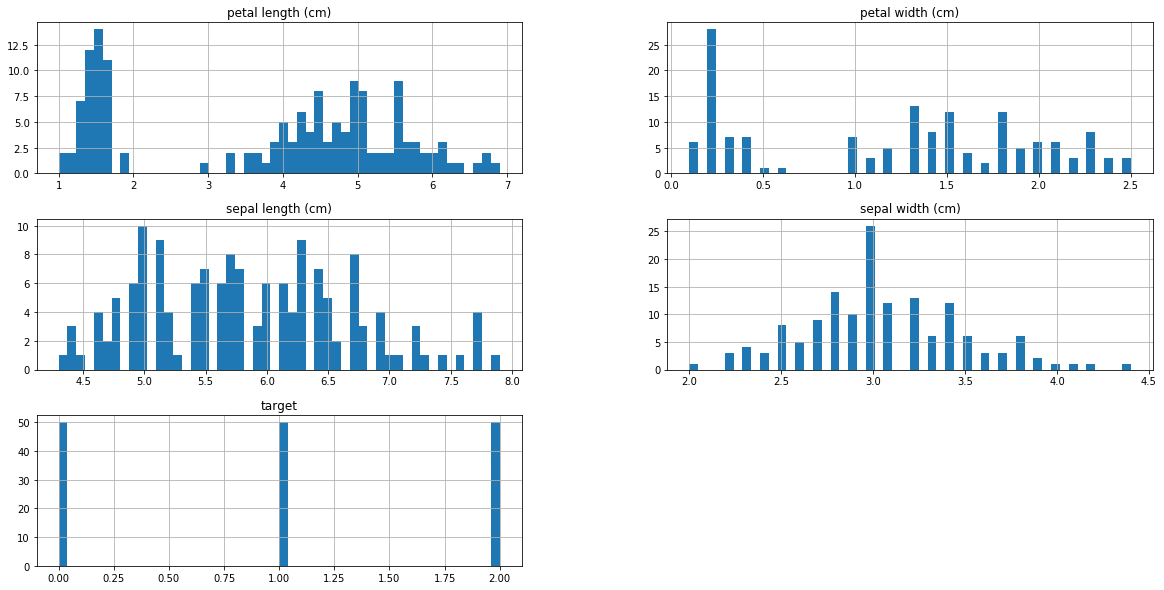

In [38]:
# 查看数据的分布
df.hist(bins=50, figsize=(20, 10))
plt.show()

### 2.2 相关性分析

In [40]:
# 读取数据集
df = pd.read_csv(dataset_filename)

# 计算特征与目标的相关性
# 小数据集可以这样计算
corr = df.corr()
print(corr['target'].sort_values(ascending=False))

target               1.000000
petal width (cm)     0.956464
petal length (cm)    0.949043
sepal length (cm)    0.782561
sepal width (cm)    -0.419446
Name: target, dtype: float64


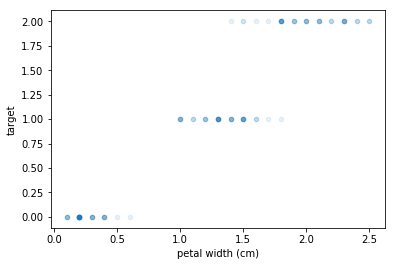

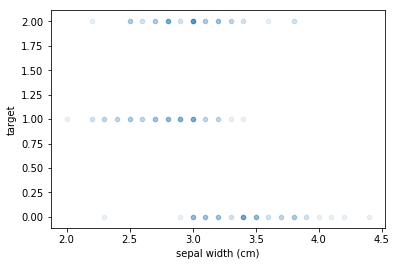

In [41]:
# 相关性散点图
df.plot(kind='scatter', x='petal width (cm)', y='target', alpha=0.1)
plt.show()
df.plot(kind='scatter', x='sepal width (cm)', y='target', alpha=0.1)
plt.show()

### 2.3 评估指标

In [105]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
print(precision_score(y_true, y_pred, average='macro'))
print(recall_score(y_true, y_pred, average='macro'))
print(f1_score(y_true, y_pred, average='macro'))

0.2222222222222222
0.3333333333333333
0.26666666666666666


### 2.4 使用sklearn构建逻辑回归模型

#### 2.4.1 逻辑回归算法

其主要参数：

- penalty：在调参时如果我们主要的目的只是为了解决过拟合，一般penalty选择l2正则化就够了。但是如果选择l2正则化发现还是过拟合，即预测效果差的时候，就可以考虑l1正则化。另外，如果模型的特征非常多，我们希望一些不重要的特征系数归零，从而让模型系数稀疏化的话，也可以使用l1正则化。
- solver：solver参数决定了我们对逻辑回归损失函数的优化方法。newton-cg、sag和lbfgs求解算法只支持l2正则化(惩罚项)，对某些高维数据收敛更快
- max_iter：算法收敛最大迭代次数，仅在正则化优化算法为newton-cg, sag和lbfgs才有用
- multi_class：分类方式选择参数，ovr 即 one-vs-rest(OvR)，而 multinomial 即 many-vs-many(MvM)

In [132]:
from sklearn.linear_model import LogisticRegression
LogisticRegression?

In [120]:
from sklearn.metrics import precision_recall_fscore_support

def print_metres(true_y, pred_y):
    p, r, f1, _ = precision_recall_fscore_support(true_y, pred_y, average='macro')
    print("精确率: %.3f, 召回率: %.3f, F1值: %.3f" % (p, r, f1))
    return p, r, f1

In [103]:
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_csv('iris.csv')
train_set, test_set = train_test_split(df, test_size=0.3)

# 先从一个特征变量开始
features = train_set.columns.tolist()
features.remove('target')

train_x = pd.DataFrame(train_set, columns=features)
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=features)
test_y = pd.DataFrame(test_set, columns=['target'])

# 主要参数：
model = LogisticRegression()
model.fit(train_x, train_y)

# 模型评估
pred_y = model.predict(train_x)
print(train_y.shape, pred_y.shape)
print_metres(train_y, pred_y)

pred_y = model.predict(test_x)
print_metres(test_y, pred_y)

(105, 1) (105,)
精确率: 0.974, 召回率: 0.972, F1值: 0.972
精确率: 0.958, 召回率: 0.952, F1值: 0.952


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


#### 2.4.2 随机梯度下降法
而sklearn中，LogisticRegression的实现方法是基于“liblinear”, “newton-cg”, “lbfgs” and “sag”这些库来实现的，当数据集特别大的时候，推荐使用SGDClassifier中的逻辑回归。

重要参数：

- loss	损失函数选择项，字符串型；默认为’hinge’即SVM；'log’为逻辑回归
- penalty	惩罚项（正则项）,字符串型；默认为’l2’;其余有’none’,‘l1’,‘elasticnet’
- alpha	惩罚参数,浮点型；默认值为0.0001
- max_iter	迭代次数，整数型；默认值为None
- learning_rate	学习率，字符串型；默认值为’optimal’，根据alpha计算得到

说明：SGDClassifier是一系列采用了梯度下降来求解参数的算法的集合，例如（SVM, logistic regression)等

In [133]:
from sklearn.linear_model import SGDClassifier
SGDClassifier?

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: 

精确率: 0.505, 召回率: 0.667, F1值: 0.560
精确率: 0.487, 召回率: 0.667, F1值: 0.544
精确率: 0.505, 召回率: 0.667, F1值: 0.560
精确率: 0.487, 召回率: 0.667, F1值: 0.544
精确率: 0.505, 召回率: 0.667, F1值: 0.560
精确率: 0.487, 召回率: 0.667, F1值: 0.544
精确率: 0.505, 召回率: 0.667, F1值: 0.560
精确率: 0.487, 召回率: 0.667, F1值: 0.544
精确率: 0.505, 召回率: 0.667, F1值: 0.560
精确率: 0.487, 召回率: 0.667, F1值: 0.544
精确率: 0.505, 召回率: 0.667, F1值: 0.560
精确率: 0.487, 召回率: 0.667, F1值: 0.544
精确率: 0.505, 召回率: 0.667, F1值: 0.560
精确率: 0.487, 召回率: 0.667, F1值: 0.544
精确率: 0.505, 召回率: 0.667, F1值: 0.560
精确率: 0.487, 召回率: 0.667, F1值: 0.544
精确率: 0.848, 召回率: 0.704, F1值: 0.635
精确率: 0.827, 召回率: 0.690, F1值: 0.594
精确率: 0.505, 召回率: 0.667, F1值: 0.560
精确率: 0.487, 召回率: 0.667, F1值: 0.544
精确率: 0.505, 召回率: 0.667, F1值: 0.560
精确率: 0.487, 召回率: 0.667, F1值: 0.544
精确率: 0.505, 召回率: 0.667, F1值: 0.560
精确率: 0.487, 召回率: 0.667, F1值: 0.544
精确率: 0.843, 召回率: 0.685, F1值: 0.599
精确率: 0.487, 召回率: 0.667, F1值: 0.544
精确率: 0.874, 召回率: 0.787, F1值: 0.766
精确率: 0.867, 召回率: 0.810, F1值: 0.783
精确率: 0.505, 召回率: 0.6

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect

精确率: 0.885, 召回率: 0.815, F1值: 0.802
精确率: 0.867, 召回率: 0.810, F1值: 0.783
精确率: 0.910, 召回率: 0.870, F1值: 0.868
精确率: 0.877, 召回率: 0.833, F1值: 0.814
精确率: 0.885, 召回率: 0.815, F1值: 0.802
精确率: 0.867, 召回率: 0.810, F1值: 0.783
精确率: 0.910, 召回率: 0.870, F1值: 0.868
精确率: 0.867, 召回率: 0.810, F1值: 0.783
精确率: 0.901, 召回率: 0.852, F1值: 0.847
精确率: 0.867, 召回率: 0.810, F1值: 0.783
精确率: 0.936, 召回率: 0.917, F1值: 0.917
精确率: 0.902, 召回率: 0.881, F1值: 0.870
精确率: 0.920, 召回率: 0.889, F1值: 0.888
精确率: 0.877, 召回率: 0.833, F1值: 0.814
精确率: 0.936, 召回率: 0.917, F1值: 0.917
精确率: 0.902, 召回率: 0.881, F1值: 0.870
精确率: 0.910, 召回率: 0.870, F1值: 0.868
精确率: 0.867, 召回率: 0.810, F1值: 0.783
精确率: 0.920, 召回率: 0.889, F1值: 0.888
精确率: 0.877, 召回率: 0.833, F1值: 0.814
精确率: 0.910, 召回率: 0.870, F1值: 0.868
精确率: 0.877, 召回率: 0.833, F1值: 0.814
精确率: 0.885, 召回率: 0.815, F1值: 0.802
精确率: 0.867, 召回率: 0.810, F1值: 0.783
精确率: 0.910, 召回率: 0.870, F1值: 0.868
精确率: 0.877, 召回率: 0.833, F1值: 0.814


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect

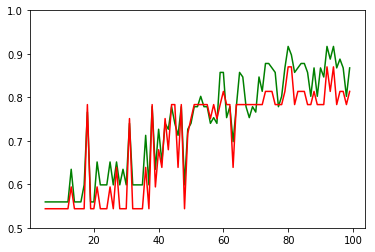

In [140]:
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('iris.csv')
train_set, test_set = train_test_split(df, test_size=0.3)

# 先从一个特征变量开始
features = train_set.columns.tolist()
features.remove('target')

train_x = pd.DataFrame(train_set, columns=features)
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=features)
test_y = pd.DataFrame(test_set, columns=['target'])


def create_model(max_iter):
    # 为了能看到f1值随迭代次数的变化而变化，这里故意设置的常亮学习率
    model = SGDClassifier(loss='log', max_iter=max_iter, learning_rate='constant', eta0=1e-3)
    model.fit(train_x, train_y)

    # 模型评估
    pred_y = model.predict(train_x)
    _, _, train_f1 = print_metres(train_y, pred_y)

    pred_y = model.predict(test_x)
    _, _, test_f1 = print_metres(test_y, pred_y)
    return [train_f1, test_f1]

# 对比不同学习率下的f1值
all_f1 = []
for i in range(5, 100):
    max_iter = i
    f1 = create_model(max_iter)
    all_f1.append(f1)
    
Y = [
    [f1 for f1, _ in all_f1],
    [f1 for _, f1 in all_f1]
]
X = [i for i in range(5, 100)]
plt.ylim(0.5, 1)
plt.plot(X, Y[0], 'g-', label='训练')
plt.plot(X, Y[1], 'r-', label='测试')

## 3. 导入sklearn的内置数据集

sklearn内置的数据集其实有好几个，那都是机器学习的资源。如：

```
            load_digits()       load_files          load_sample_image   load_wine             
            load_boston         load_iris           load_sample_images                        
            load_breast_cancer  load_linnerud       load_svmlight_file                        
            load_diabetes       load_mlcomp         load_svmlight_files
```

如手写数字数据集：

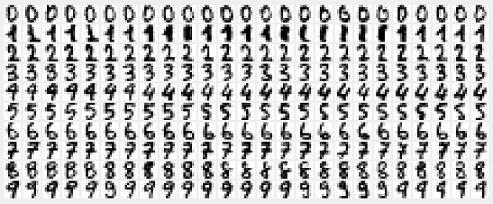

In [112]:
from sklearn.datasets import load_digits

data = load_digits()
data

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of

## 3. ROC曲线与AUC值

see more: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

In [68]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier

# 导入数据并处理成二分类
iris = datasets.load_iris()
X = iris.data
y = iris.target
y[y == 2] = 0
print(X.shape)

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = SGDClassifier(loss='log', max_iter=10, eta0=1e-3)

# 计算得分
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print(roc_auc)

(150, 4)
0.7496296296296296


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


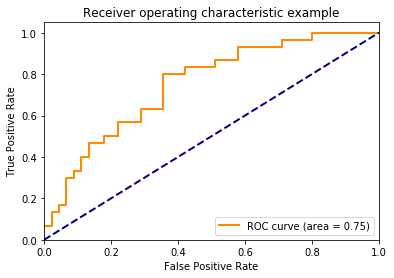

In [69]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()